In [1]:
import os.path

import pandas as pd
import torch
from transformers import AutoTokenizer

In [2]:
data = pd.read_csv("data/preprocessed/cleaned.csv")

In [3]:
tokenizer = AutoTokenizer.from_pretrained('bert-base-uncased')

In [4]:
def tokenize_function(text):
    return tokenizer(text, padding=True, truncation=True, max_length=128, return_tensors='pt')

In [5]:
tokenized = tokenize_function(data['review_text'].tolist())

In [6]:
# Convert tensors to list format and assign them correctly
data['input_ids'] = tokenized['input_ids'].squeeze().tolist()
data['token_type_ids'] = tokenized['token_type_ids'].squeeze().tolist()
data['attention_mask'] = tokenized['attention_mask'].squeeze().tolist()

In [7]:
data['input_ids']

0        [101, 2220, 3229, 3319, 102, 0, 0, 0, 0, 0, 0,...
1        [101, 2339, 2180, 2102, 2023, 8816, 102, 0, 0,...
2        [101, 2428, 10392, 2208, 3325, 1037, 5257, 199...
3        [101, 2175, 2041, 2006, 2019, 6172, 1010, 2022...
4        [101, 1996, 2190, 2517, 2208, 1045, 2031, 2412...
                               ...                        
16484    [101, 2070, 2335, 2023, 2208, 2097, 1625, 3015...
16485    [101, 2428, 5024, 5519, 6293, 13108, 2007, 438...
16486    [101, 3565, 2567, 102, 0, 0, 0, 0, 0, 0, 0, 0,...
16487    [101, 10424, 8004, 11528, 12476, 2021, 2025, 3...
16488    [101, 2023, 2208, 2003, 2428, 12476, 1012, 229...
Name: input_ids, Length: 16489, dtype: object

In [8]:
data

,app_id,app_name,review_text,review_score,urls,contains_url,raw_text,review_length,word_counts,input_ids,token_type_ids,attention_mask
0,252490,Rust,early access review,1,[],False,Early Access Review,19,3,"[101, 2220, 3229, 3319, 102, 0, 0, 0, 0, 0, 0,...","[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ...","[1, 1, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ..."
1,107410,Arma 3,why wont this download,1,[],False,? why won't this download,22,4,"[101, 2339, 2180, 2102, 2023, 8816, 102, 0, 0,...","[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ...","[1, 1, 1, 1, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, ..."
2,459010,Ghost Town Mine Ride & Shootin' Gallery,really fantastic game experience a combination...,1,[],False,Really fantastic game experience - a combinati...,390,70,"[101, 2428, 10392, 2208, 3325, 1037, 5257, 199...","[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ...","[1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, ..."
3,8930,Sid Meier's Civilization V,"go out on an adventure, be honerouble, get res...",1,[],False,"Go out on an adventure, be honerouble, get res...",1377,256,"[101, 2175, 2041, 2006, 2019, 6172, 1010, 2022...","[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ...","[1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, ..."
4,108710,Alan Wake,the best written game i have ever played as we...,1,[],False,The best written game I have ever played as we...,537,103,"[101, 1996, 2190, 2517, 2208, 1045, 2031, 2412...","[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ...","[1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, ..."
...,...,...,...,...,...,...,...,...,...,...,...,...
16484,255710,Cities: Skylines,some times this game will ♥♥♥♥ you over realy ...,1,[],False,some times this game will ♥♥♥♥ YOU OVER REALY ...,188,41,"[101, 2070, 2335, 2023, 2208, 2097, 1625, 3015...","[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ...","[1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, ..."
16485,250110,Assault Android Cactus,really solid twin stick shooter with tight con...,1,[],False,Really solid twin stick shooter with tight con...,849,149,"[101, 2428, 5024, 5519, 6293, 13108, 2007, 438...","[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ...","[1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, ..."
16486,205950,Jet Set Radio,super brother,1,[],False,Super brother,13,2,"[101, 3565, 2567, 102, 0, 0, 0, 0, 0, 0, 0, 0,...","[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ...","[1, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ..."
16487,377160,Fallout 4,friggin awesome but not quite as good as fnv yet.,1,[],False,Friggin awesome but not quite as good as FNV.....,49,10,"[101, 10424, 8004, 11528, 12476, 2021, 2025, 3...","[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ...","[1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, ..."


In [9]:
from sklearn.model_selection import train_test_split

In [10]:
X_train, X_test, y_train, y_test = train_test_split(data[['input_ids']], data['review_score'], test_size=0.2,random_state=42)

In [11]:
len(X_train['input_ids'].iloc[0])
len(X_train['input_ids'].iloc[1])

128

In [12]:
torch.tensor(X_train['input_ids'].tolist())

tensor([[  101,  2023,  1998,  ...,     0,     0,     0],
        [  101,  2023,  2208,  ...,     0,     0,     0],
        [  101,  2428,  5959,  ...,     0,     0,     0],
        ...,
        [  101,  8680,  2208,  ...,     0,     0,     0],
        [  101,  1045,  2123,  ...,     0,     0,     0],
        [  101, 25430,  8490,  ...,     0,     0,     0]])

In [13]:
from torch.utils.data import Dataset, DataLoader

In [14]:
class RatingDataset(Dataset):
    def __init__(self, ids: pd.DataFrame, labels: pd.Series):
        self.ids = torch.tensor(ids['input_ids'].tolist(), dtype=torch.long)
        self.labels = torch.tensor(labels.tolist(), dtype=torch.float).unsqueeze(1)

    def __len__(self):
        return len(self.ids)

    def __getitem__(self, idx):
        return self.ids[idx], self.labels[idx]


In [15]:
train_ds = RatingDataset(X_train, y_train)
val_ds = RatingDataset(X_test, y_test)

In [16]:
train_dl = DataLoader(train_ds, batch_size=128, shuffle=True)
val_dl = DataLoader(val_ds, batch_size=128, shuffle=False)

In [17]:
texts, labels = next(iter(train_dl))
texts.shape, labels.shape

(torch.Size([128, 128]), torch.Size([128, 1]))

In [18]:
tokenizer.decode(texts[0])

'[CLS] what can i say about the game that i have been looking forward to for long time and since i had a player of the original version. i have shaer story on a fe internt forums. i dont know i bothered to get thi on steam, opther than to just see what differences steam might have added to the game. just small things like achievements amp art worked based onthe game that might be included with the digital download. sure, this game has its problems, even before i get to play it. sometimes i cant even log in, and other times my iternet is so lousy. [SEP]'

In [19]:
texts[0]

tensor([  101,  2054,  2064,  1045,  2360,  2055,  1996,  2208,  2008,  1045,
         2031,  2042,  2559,  2830,  2000,  2005,  2146,  2051,  1998,  2144,
         1045,  2018,  1037,  2447,  1997,  1996,  2434,  2544,  1012,  1045,
         2031, 21146,  2121,  2466,  2006,  1037, 10768, 25204,  2102, 21415,
         1012,  1045,  2123,  2102,  2113,  1045, 11250,  2000,  2131, 16215,
         2072,  2006,  5492,  1010, 23569,  5886,  2084,  2000,  2074,  2156,
         2054,  5966,  5492,  2453,  2031,  2794,  2000,  1996,  2208,  1012,
         2074,  2235,  2477,  2066, 10106, 23713,  2396,  2499,  2241,  2006,
        10760,  2208,  2008,  2453,  2022,  2443,  2007,  1996,  3617,  8816,
         1012,  2469,  1010,  2023,  2208,  2038,  2049,  3471,  1010,  2130,
         2077,  1045,  2131,  2000,  2377,  2009,  1012,  2823,  1045,  2064,
         2102,  2130,  8833,  1999,  1010,  1998,  2060,  2335,  2026,  2009,
        11795,  3388,  2003,  2061, 10223,  6508,  1012,   102])

In [20]:
import torch.nn as nn
from torch import optim

In [21]:
# class SentimentLSTM(nn.Module):
#     def __init__(self, vocab_length, maxlen):
#         super(SentimentLSTM, self).__init__()
#         self.embedding = nn.Embedding(num_embeddings=vocab_length, embedding_dim=128, max_norm=maxlen)
#         self.bidirectional_lstm = nn.LSTM(input_size=128, hidden_size=128, batch_first=True, bidirectional=True)
#         self.gru = nn.GRU(input_size=256, hidden_size=64, batch_first=True)  # 256: 128 * 2 for bidirectional LSTM
#         self.lstm = nn.LSTM(input_size=64, hidden_size=64, batch_first=True)
#         self.fc1 = nn.Linear(in_features=64, out_features=16)
#         self.bn = nn.BatchNorm1d(num_features=16)
#         self.dropout = nn.Dropout(0.1)
#         self.output = nn.Linear(in_features=16, out_features=1)
#
#     def forward(self, x):
#         x = self.embedding(x)
#         x, _ = self.bidirectional_lstm(x)
#         x, _ = self.gru(x)
#         x, _ = self.lstm(x)
#         x = x[:, -1, :]  # Take the last time step's output
#         x = self.fc1(x)
#         x = nn.ReLU()(x)
#         x = self.bn(x)
#         x = self.dropout(x)
#         x = self.output(x)
#         return x

In [22]:
# class Attention(nn.Module):
#     def __init__(self, hidden_size):
#         super(Attention, self).__init__()
#         self.attention = nn.Linear(hidden_size, 1)
#
#     def forward(self, x):
#         # x: (batch_size, seq_length, hidden_size)
#         scores = self.attention(x).squeeze(-1)  # (batch_size, seq_length)
#         weights = nn.functional.softmax(scores, dim=1)  # (batch_size, seq_length)
#         output = (x * weights.unsqueeze(-1)).sum(dim=1)  # (batch_size, hidden_size)
#         return output, weights
#
#
# class SentimentLSTM(nn.Module):
#     def __init__(self, vocab_length):
#         super(SentimentLSTM, self).__init__()
#         self.embedding = nn.Embedding(num_embeddings=vocab_length, embedding_dim=256, padding_idx=0)
#         self.bidirectional_lstm = nn.LSTM(input_size=256, hidden_size=128, batch_first=True, bidirectional=True)
#         self.transition = nn.Linear(256, 256)
#         self.attention = Attention(hidden_size=256)  # BiLSTM hidden_dim * 2
#         self.gru = nn.GRU(input_size=256, hidden_size=128, batch_first=True)
#         self.fc1 = nn.Linear(in_features=128, out_features=64)
#         self.bn1 = nn.BatchNorm1d(num_features=64)
#         self.dropout1 = nn.Dropout(0.3)
#         self.fc2 = nn.Linear(in_features=64, out_features=16)
#         self.bn2 = nn.BatchNorm1d(num_features=16)
#         self.dropout2 = nn.Dropout(0.3)
#         self.output = nn.Linear(in_features=16, out_features=1)
#
#     def forward(self, x):
#         x = self.embedding(x)
#         x, _ = self.bidirectional_lstm(x)
#         print(x.shape)
#         x,_ = self.attention(x)
#         print(x.shape)
#         # x = self.transition(x)
#         x, _ = self.gru(x)
#         x = self.fc1(x)
#         x = nn.LeakyReLU()(x)
#         print(x.shape)
#         x = self.bn1(x)
#         x = self.dropout1(x)
#         x = self.fc2(x)
#         x = nn.LeakyReLU()(x)
#         x = self.bn2(x)
#         x = self.dropout2(x)
#         x = self.output(x)
#         return x

In [23]:
from datetime import datetime

In [73]:
class SentimentLSTM(nn.Module):
    def __init__(self, no_layers, vocab_size, hidden_dim, embedding_dim, output_dim, drop_prob=0.3, bidirectional=False):
        super(SentimentLSTM, self).__init__()
        self.output_dim = output_dim
        self.hidden_dim = hidden_dim
        self.no_layers = no_layers
        self.bidirectional = bidirectional

        # Embedding layer
        self.embedding = nn.Embedding(vocab_size, embedding_dim)

        # LSTM layer
        self.lstm = nn.LSTM(
            input_size=embedding_dim,
            hidden_size=hidden_dim,
            num_layers=no_layers,
            batch_first=True,
            bidirectional=bidirectional
        )

        # Dropout layer
        self.dropout = nn.Dropout(drop_prob)

        # Fully connected layer
        self.fc = nn.Linear(hidden_dim * (2 if bidirectional else 1), hidden_dim if bidirectional else output_dim)

        if bidirectional:
            self.bn = nn.BatchNorm1d(num_features=hidden_dim)
            self.act = nn.LeakyReLU()
            self.final = nn.Linear(hidden_dim, output_dim)


    def forward(self, x):
        batch_size = x.size(0)
        num_directions = 2 if self.bidirectional else 1

        # Initialize hidden state and cell state
        h = torch.zeros(self.no_layers * num_directions, batch_size, self.hidden_dim).to(x.device)
        c = torch.zeros(self.no_layers * num_directions, batch_size, self.hidden_dim).to(x.device)

        # Embedding and LSTM
        embeds = self.embedding(x)  # Shape: (batch_size, seq_length, embedding_dim)
        lstm_out, (h, c) = self.lstm(embeds, (h, c))  # lstm_out: (batch_size, seq_length, hidden_dim * num_directions)

        # Take the hidden state from the last timestep
        last_hidden = lstm_out[:, -1, :]  # Shape: (batch_size, hidden_dim * num_directions)

        # Dropout and fully connected layer
        out = self.dropout(last_hidden)
        out = self.fc(out)  # Shape: (batch_size, output_dim)

        if self.bidirectional:
            out = self.final(self.act(self.bn(out)))

        return out

In [74]:
len(tokenizer)

30522

In [75]:
device = torch.device("cuda")

In [85]:
model = SentimentLSTM(no_layers=4,vocab_size=len(tokenizer)+1,hidden_dim=256,
                      embedding_dim=128,output_dim=1,drop_prob=0.3, bidirectional=True)
model = model.to(device)
print(model)

SentimentLSTM(
  (embedding): Embedding(30523, 128)
  (lstm): LSTM(128, 256, num_layers=3, batch_first=True, bidirectional=True)
  (dropout): Dropout(p=0.3, inplace=False)
  (fc): Linear(in_features=512, out_features=1, bias=True)
)


In [86]:
criterion = nn.BCEWithLogitsLoss()
# optimizer = optim.Adam(model.parameters(), lr=0.0005, weight_decay=1e-5)
optimizer = optim.Adam(model.parameters(), lr=0.0001, weight_decay=1e-5)

In [87]:
# Test the model with a batch from the training DataLoader
batch_ids, batch_labels = next(iter(train_dl))
batch_ids, batch_labels = batch_ids.to(device), batch_labels.to(device)
with torch.no_grad():
    print(batch_ids.shape)
    out = model(batch_ids)
    print(out.shape)
    loss = criterion(batch_labels, out)
  # Should match the batch size and output dimensions

torch.Size([128, 128])
torch.Size([128, 1])


In [88]:
from candle import Trainer
from candle.metrics import Accuracy, Precision, Recall
from candle.callbacks import EarlyStopping

In [89]:
metrics = [Accuracy(), Precision(), Recall()]

In [90]:
trainer = Trainer(
    model=model,
    criterion=criterion,
    input_shape=(128,128),
    optimizer=optimizer,
    metrics=metrics,
    callbacks=[EarlyStopping(basis="val_accuracy", metric_minimize=False, patience=10, threshold=0.85)],
    display_time_elapsed=True,
    device=torch.device('cuda')
)

In [91]:
history = trainer.fit(train_dl, val_dl, epochs=100)

EPOCH 0: : 104it [00:09, 10.60it/s]
--> Metrics:   accuracy: 0.8243 ,val_accuracy: 0.8286 ,precision: 0.8243 ,val_precision: 0.8286 ,recall: 1.0000 ,val_recall: 1.0000 ,loss: 0.4859 ,val_loss: 0.4591
Time elapsed: 11.021353721618652 s
----------------------------------------------------------------------------------------------------
EPOCH 1: : 104it [00:09, 10.97it/s]
--> Metrics:   accuracy: 0.8256 ,val_accuracy: 0.8286 ,precision: 0.8256 ,val_precision: 0.8286 ,recall: 1.0000 ,val_recall: 1.0000 ,loss: 0.4612 ,val_loss: 0.4573
Time elapsed: 21.439709901809692 s
----------------------------------------------------------------------------------------------------
EPOCH 2: : 104it [00:09, 10.89it/s]
--> Metrics:   accuracy: 0.8230 ,val_accuracy: 0.8286 ,precision: 0.8230 ,val_precision: 0.8286 ,recall: 1.0000 ,val_recall: 1.0000 ,loss: 0.4635 ,val_loss: 0.4571
Time elapsed: 31.988802671432495 s
---------------------------------------------------------------------------------------------

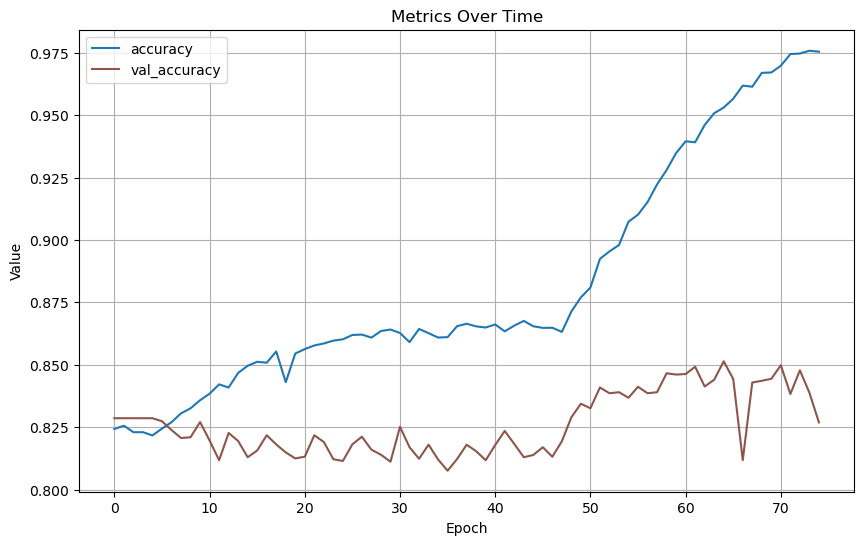

In [92]:
trainer.tracker.plot("accuracy", "val_accuracy")

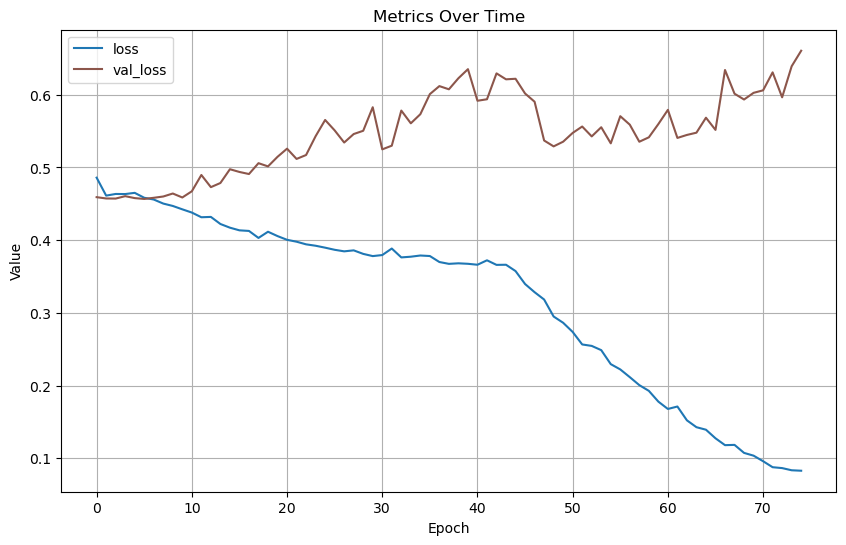

In [93]:
trainer.tracker.plot("loss", "val_loss")

In [98]:
def save_model(model, path, metric):
        if not isinstance(metric, dict) or 'name' not in metric or 'val' not in metric:
            raise ValueError("Metric dictionary must contain 'name' and 'val' keys.")

        timestamp = datetime.now().strftime("%Y-%m-%d_%H-%M-%S")
        save_filename = f"{timestamp}-{metric['name']}-{metric['val']:.4f}.pt"
        save_path = os.path.join(path, save_filename)

        try:
            os.makedirs(path, exist_ok=True)
            torch.save(model.state_dict(), save_path)
            print(f"Model saved successfully at {save_path}")
        except Exception as e:
            print(f"Failed to save the model: {e}")

Successfully saved progress!


In [99]:
save_model(
    model,
    "artifacts/lstm",
    {"name":
         "val_accuracy",
     "val":
         trainer.tracker.metrics['val_accuracy'].records[-1]}
)

{'epoch': 64,
 'accuracy': 0.9530498798076923,
 'val_accuracy': 0.8513846644427001,
 'precision': 0.9668210722465543,
 'val_precision': 0.8831952180144911,
 'recall': 0.976519459588062,
 'val_recall': 0.9458020001266818,
 'loss': 0.13920985724633703,
 'val_loss': 0.5683508160022589}